In [3]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import imageio
import math
from skimage.color import rgb2gray

In [2]:
SMALL_SIZE = 12
MEDIUM_SIZE = 14
BIGGER_SIZE = 13

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

## Introduction

### Global Thresholding

In [3]:
# Load a grayscale image
original_img = cv2.imread('./assets/fiducial.pgm', 0)
print("Image shape:",original_img.shape)

height, width = original_img.shape[0:2]

print("Min value:",np.min(original_img))
print("Max value:",np.max(original_img))

Image shape: (480, 640)
Min value: 2
Max value: 255


In [4]:
# implementing basic thresholding
threshold_img = original_img > 128

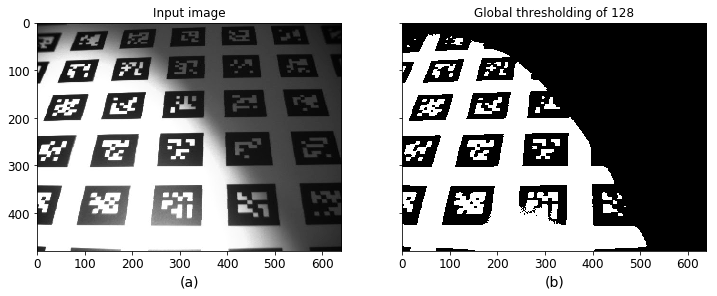

In [5]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharex='col', sharey='row', figsize=(12,10))
ax1.imshow(original_img, cmap='gray')
ax1.set_title('Input image')
ax1.set_xlabel("(a)")
ax2.imshow(threshold_img, cmap='gray')
ax2.set_title('Global thresholding of 128')
ax2.set_xlabel("(b)")
plt.show()

## Halftone Patterning Dithering

In [6]:
## define pattern kernels
# standard filters
p1 = np.array([[0,0,0],[0,0,0],[0,0,0]])
p2 = np.array([[0,0,0],[0,1,0],[0,0,0]])
p3 = np.array([[0,0,0],[1,1,0],[0,0,0]])
p4 = np.array([[0,0,0],[1,1,0],[0,1,0]])
p5 = np.array([[0,0,0],[1,1,1],[0,1,0]])
p6 = np.array([[0,0,1],[1,1,1],[0,1,0]])
p7 = np.array([[0,0,1],[1,1,1],[1,1,0]])
p8 = np.array([[1,0,1],[1,1,1],[1,1,0]])
p9 = np.array([[1,0,1],[1,1,1],[1,1,1]])
p10 = np.array([[1,1,1],[1,1,1],[1,1,1]])
standard_filters = [p1,p2,p3,p4,p5,p6,p7,p8,p9,p10]
print("Number of intensity patterns:",len(standard_filters))

# Bayer filter
p1 = np.array([[0,0,0,0],[0,0,0,0],[0,0,0,0],[0,0,0,0]])
p2 = np.array([[1,0,0,0],[0,0,0,0],[0,0,0,0],[0,0,0,0]])
p3 = np.array([[1,0,0,0],[0,0,0,0],[0,0,1,0],[0,0,0,0]])
p4 = np.array([[1,0,0,0],[0,0,0,0],[1,0,1,0],[0,0,0,0]])
p5 = np.array([[1,0,1,0],[0,0,0,0],[1,0,1,0],[0,0,0,0]])
p6 = np.array([[1,0,1,0],[0,1,0,0],[1,0,1,0],[0,0,0,0]])
p7 = np.array([[1,0,1,0],[0,1,0,0],[1,0,1,0],[0,0,0,1]])
p8 = np.array([[1,0,1,0],[0,1,0,0],[1,0,1,0],[0,1,0,1]])
p9 = np.array([[1,0,1,0],[0,1,0,1],[1,0,1,0],[0,1,0,1]])
p10 = np.array([[1,0,1,0],[1,1,0,1],[1,0,1,0],[0,1,0,1]])
p11 = np.array([[1,0,1,0],[1,1,0,1],[1,0,1,0],[0,1,1,1]])
p12 = np.array([[1,0,1,0],[1,1,0,1],[1,0,1,0],[1,1,1,1]])
p13 = np.array([[1,0,1,0],[1,1,1,1],[1,0,1,0],[1,1,1,1]])
p14 = np.array([[1,1,1,0],[1,1,1,1],[1,0,1,0],[1,1,1,1]])
p15 = np.array([[1,1,1,0],[1,1,1,1],[1,0,1,1],[1,1,1,1]])
p16 = np.array([[1,1,1,0],[1,1,1,1],[1,1,1,1],[1,1,1,1]])
p17 = np.array([[1,1,1,1],[1,1,1,1],[1,1,1,1],[1,1,1,1]])

bayer_filters = [p1,p2,p3,p4,p5,p6,p7,p8,p9,p10,p11,p12,p13,p14,p15,p16,p17]
print("Number of intensity patterns:",len(bayer_filters))

Number of intensity patterns: 10
Number of intensity patterns: 17


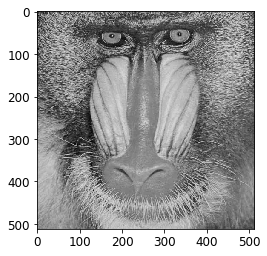

In [7]:
# read and display image
image = cv2.imread('./assets/baboon.pgm',0)
plt.imshow(image,cmap="gray")

In [8]:
def halftone_patterning(image,filter_type="standard"):
    # defines the type of patterning to be used
    if filter_type == "standard":
        filters = standard_filters
    elif filter_type == "bayer":
        filters = bayer_filters
    else:
        print("Invalid filter option. Choose one of 'standard' or 'bayer'.")
        return None
    
    # get the dimensions of the filter
    m,n = filters[0].shape[0:2]
    print("Filter dim:", m,n)
    
    # get the image dimensions
    h,w = image.shape[0:2]
    print("Image dim:", h,w)
    normalizer = np.max(image) / (m*n)
    
    # normalize the image based on the kernel size
    image_norm = np.round(image / normalizer).astype(int)
    
    print("Image pixel range:",np.min(image_norm), np.max(image_norm))
    # create the output image
    out_image = np.zeros((m*h,n*w))
    
    # for each pixel on the image substitute by the appropriate pattern
    for i in range(h):
        for j in range(w):
            out_image[m*i:m+m*i, n*j:n+n*j] = filters[image_norm[i,j]]
    
    return out_image

Filter dim: 3 3
Image dim: 512 512
Image pixel range: 0 9


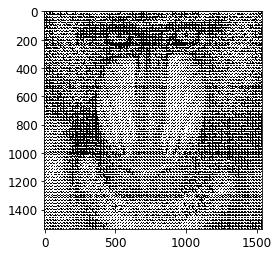

In [9]:
# apply haftone patterning
out_image = halftone_patterning(image, filter_type="standard")

# save and display the image
cv2.imwrite("./output/halftone_patterning_1.png",out_image*255)

# plt.figure(figsize=(20,10))
plt.imshow(out_image, cmap="gray")

Filter dim: 4 4
Image dim: 512 512
Image pixel range: 0 16


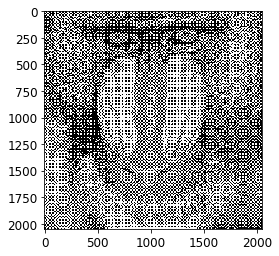

In [10]:
# apply haftone patterning using bayer filter
out_image = halftone_patterning(image,filter_type="bayer")

cv2.imwrite("./output/halftone_patterning_2.png",out_image*255)

# plt.figure(figsize=(20,10))
plt.imshow(out_image, cmap="gray")

## Threshold Ordered Dithering

In [11]:
def normalize_kernel(kernel):
    # normalize threshold kernel
    return 255 * (kernel + 0.5) / (kernel.shape[0] * kernel.shape[1])

In [12]:
# The idea is that the patterns can be represented as a matrix
M44 = np.array([[0, 12, 3, 15],[8, 4, 11, 7],[2, 14, 1, 13],[10, 6, 9, 5]])
M33 = np.array([[6,8,4],[1,0,3],[5,2,7]])

# normalize the matrices so that they have the same pixel range as the input images
M33 = normalize_kernel(M33)
M44 = normalize_kernel(M44)

print(M33)
print(M44)

[[184.16666667 240.83333333 127.5       ]
 [ 42.5         14.16666667  99.16666667]
 [155.83333333  70.83333333 212.5       ]]
[[  7.96875 199.21875  55.78125 247.03125]
 [135.46875  71.71875 183.28125 119.53125]
 [ 39.84375 231.09375  23.90625 215.15625]
 [167.34375 103.59375 151.40625  87.65625]]


In [13]:
def image_padding(img, kernel):
    # make sure the output image is the same as the input and that the opeartion is valid for all pixels
    h,w = img.shape[:2]
    m,n = kernel.shape[:2]
    
    # pad image with zeros so that the output halftone image has the same dimensons as the input image 
    diff_h = h % m
    pad_height = 0
    pad_width = 0

    if diff_h > 0:
        pad_height = m - diff_h

    diff_w = w % n

    if diff_w > 0:
        pad_width = n - diff_w

    return np.pad(img, ((0, pad_height), (0, pad_width)), 'constant', constant_values=0)

In [14]:
def create_halftoning_mask(img, kernel):
    
    m,n = kernel.shape[0:2]
    print("Kernel shape:", m,n)
    
    m1 = math.floor(img.shape[0]/m)
    n1 = math.floor(img.shape[1]/n)
    
    mask = np.tile(kernel, (m1, n1))
    return mask

In [15]:
def halftoning(img, kernel):
    img = image_padding(img, kernel)
    print("New image shape:",img.shape)
    
    # create mask 
    mask = create_halftoning_mask(img, kernel)
    print("Mask shape:",mask.shape)
    
    # threshold the image with the kernel
    res = img  > mask
    return res

In [16]:
# apply threshold halftone
res_m33 = halftoning(original_img, M33)
res_m33 = res_m33[:height, :width] * 255

res_m44 = halftoning(original_img, M44)
res_m44 = res_m44[:height, :width] * 255

cv2.imwrite("output/halftone-1.jpg", res_m33, [cv2.IMWRITE_PNG_BILEVEL, 1])
cv2.imwrite("output/halftone-2.jpg", res_m44, [cv2.IMWRITE_PNG_BILEVEL, 1])

New image shape: (480, 642)
Kernel shape: 3 3
Mask shape: (480, 642)
New image shape: (480, 640)
Kernel shape: 4 4
Mask shape: (480, 640)


True

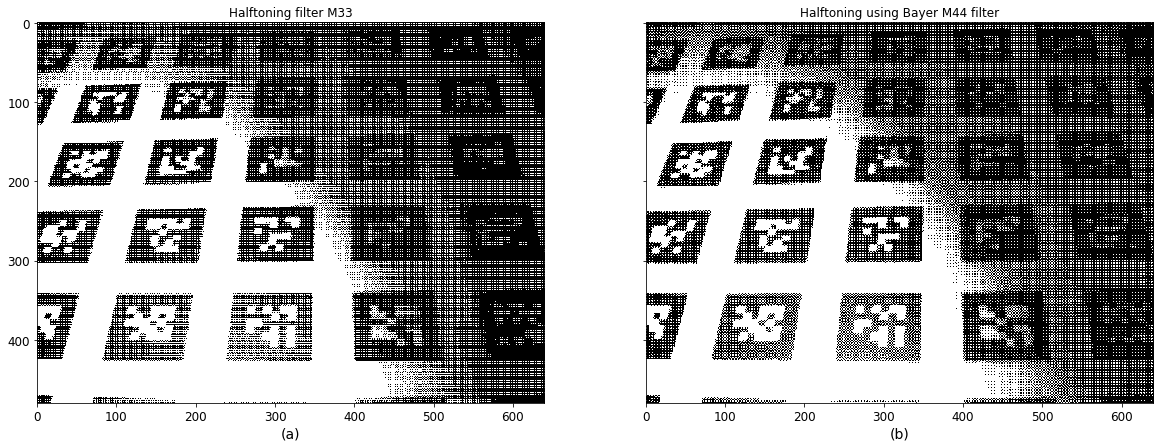

In [17]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharex='col', sharey='row', figsize=(20,10))
ax1.imshow(res_m33, cmap='gray')
ax1.set_title('Halftoning filter M33')
ax1.set_xlabel("(a)")

ax2.imshow(res_m44, cmap='gray')
ax2.set_title('Halftoning using Bayer M44 filter')
ax2.set_xlabel("(b)")
plt.show()

### Experiment with 8x8 Bayer filter

In [18]:
M88 = np.array([[0,48,12,60,3,51,15,64],
               [32,16,44,28,35,19,47,31],
               [8,56,4,52,11,59,7,55],
               [40,24,36,20,43,27,39,23],
               [2,50,14,62,1,49,13,61],
               [34,18,46,30,33,17,45,29],
               [10,58,6,54,9,57,5,53],
               [42,26,38,22,41,25,37,21]])

M88 = normalize_kernel(M88)

New image shape: (480, 640)
Kernel shape: 8 8
Mask shape: (480, 640)


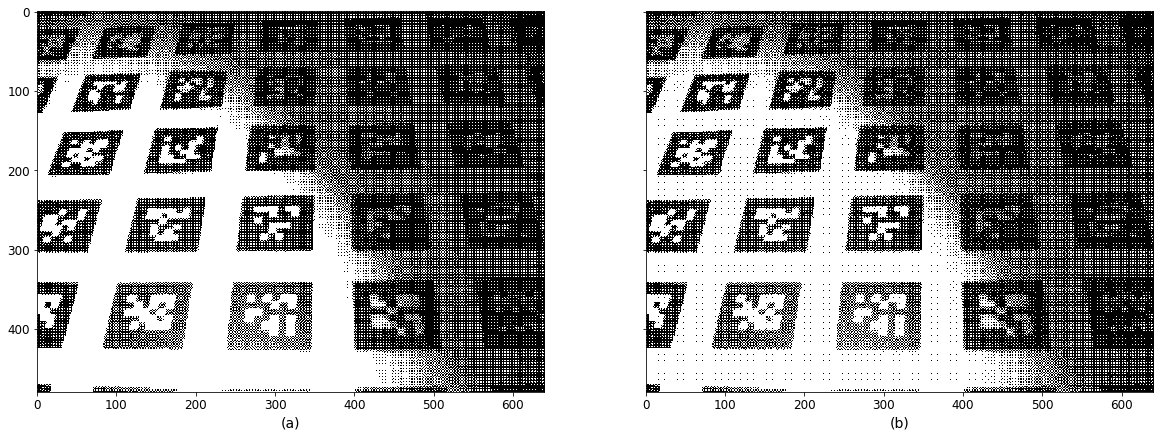

In [19]:
res_m88 = halftoning(original_img, M88)
res_m88 = res_m88[:height, :width] * 255

fig, (ax2, ax3) = plt.subplots(1, 2, sharex='col', sharey='row', figsize=(20,10))
ax2.imshow(res_m44, cmap='gray')
ax2.set_xlabel("(a)")

ax3.imshow(res_m88, cmap='gray')
ax3.set_xlabel("(b)")
plt.show()

## Halftoning Intuition

To understand how halftoning works, let's take a look at a toy example. Consider the halftoning kernel M44 defined above. The M44 kernel is known as the Bayer halftoning filter. If we look carefully at M44, we will see that it follows a well-defined pattern. That is, the values of 0,1,2,3...15 in the kernel are arranged in a pattern that looks like small crosses.

To validate this intuition, let's apply the thresholding Bayer filter to a set of image patches with constant intensity values. For each patch, let's evaluate the outcome and check if it matches our feelings.

In [20]:
a = np.ones((4,4))
I_10 = a * 10
I_30 = a * 30
I_40 = a * 40
I_60 = a * 60
I_90 = a * 90

For the first image patch, we choose a constant pixel value of 10. Note that an intensity value of 10 makes up for a very dark image patch (considering pixel range from 0 to 255). As a result, after applying the halftoning Bayer mask, we should expect much more dark pixels in the result.

As we suspected, in Figure X (a), only 1 pixel (out of 16 total) got lighted up - that is only 6.25% of the total image pixels. Now, if we progressively increase the intensity of the patch image, that is, if we make it more and more lighter (by increasing its pixel intensities), we should anticipate that the number of dark pixels would diminish. That is exactly what Figure X (b),(c), (d) and (e) gives us. As we increase the pixel intensities of the image patch from 30 to 90, the number of darker pixels gets smaller. Also, note the pattern at which the kernel lights up the white pixels - it looks like an X shape!

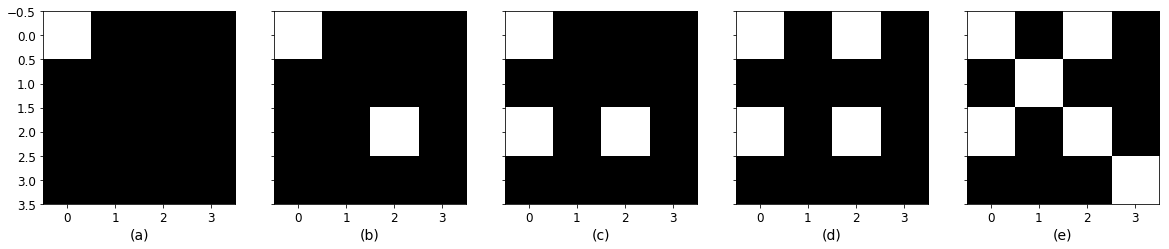

In [21]:
fig, axs = plt.subplots(1, 5, sharex='col', sharey='row', figsize=(20,10))
axs[0].imshow(I_10 > M44, cmap='gray')
axs[0].set_xlabel("(a)")

axs[1].imshow(I_30 > M44, cmap='gray')
axs[1].set_xlabel("(b)")

axs[2].imshow(I_40 > M44, cmap='gray')
axs[2].set_xlabel("(c)")

axs[3].imshow(I_60 > M44, cmap='gray')
axs[3].set_xlabel("(d)")

axs[4].imshow(I_90 > M44, cmap='gray')
axs[4].set_xlabel("(e)")

plt.show()

Now let's consider an image half black and half white pixels (a binary image). If we apply the Bayer mask to it, we should foresee no changes at all to the input image. In other words, the first half of the image, only composed with 0s would not be activated by the mask. That follows because, in this region of the image, all of the pixel values are smaller than the values of the kernel. Likewise, the other half of the image, composed solely with white (255) pixel values should all be activated (since they are all greater than the respective threshold values from the filter).

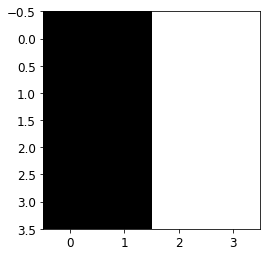

In [22]:
a = np.array(([0,0,255,255],[0,0,255,255],[0,0,255,255],[0,0,255,255]))
plt.imshow(a, cmap="gray")

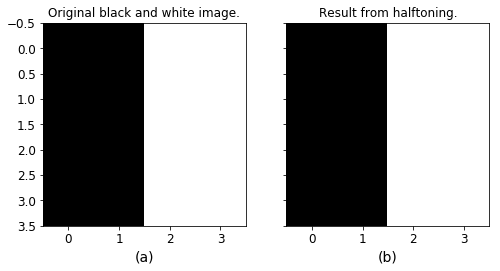

In [23]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharex='col', sharey='row', figsize=(8,8))

ax1.set_title("Original black and white image.")
ax1.imshow(a, cmap="gray")
ax1.set_xlabel("(a)")

ax2.set_title("Result from halftoning.")
ax2.imshow(a > M44, cmap="gray")
ax2.set_xlabel("(b)")

plt.show()

## Error-diffusion dithering

In [4]:
# original_img = imageio.imread('./assets/sonnet.pgm')
# Load an color image in grayscale
original_img = cv2.imread('./assets/retina.pgm', 0)
print("Image shape:",original_img.shape)

Image shape: (256, 256)


In [5]:
def error_diffusion_dithering(img, zigzag):
  
  binary = np.zeros(img.shape)

  img = np.pad(img, (1,1), 'constant', constant_values=0)
  print("Image shape:", img.shape)

  for i in range(1,img.shape[0]-1):
  
    col_ids = range(1,img.shape[1]-1)
    
    if zigzag:
      if i % 2 != 0:
        # reverse the row order
        col_ids = reversed(col_ids)

    for j in col_ids:

      # perform pixel quantization
      if img[i,j] < 128:
        binary[i-1,j-1] = 0
      else:
        binary[i-1,j-1] = 255

      error = img[i,j] - binary[i-1,j-1]

      # distribute the error to the adjacent pixels
      img[i,j+1] += (7/16)*error
      img[i+1,j-1] += (3/16)*error
      img[i+1,j] += (5/16)*error
      img[i+1,j+1] += (1/16)*error
  return binary * 255

In [6]:
# run error deffusion with 2 filter sliding strategies
out1 = error_diffusion_dithering(original_img, zigzag=True)
out2 = error_diffusion_dithering(original_img, zigzag=False)

Image shape: (258, 258)
Image shape: (258, 258)


In [7]:
cv2.imwrite("output/err-diff-zig-zig.jpg", out1, [cv2.IMWRITE_PNG_BILEVEL, 1])
cv2.imwrite("output/err-diff-left-right.jpg", out2, [cv2.IMWRITE_PNG_BILEVEL, 1])

True

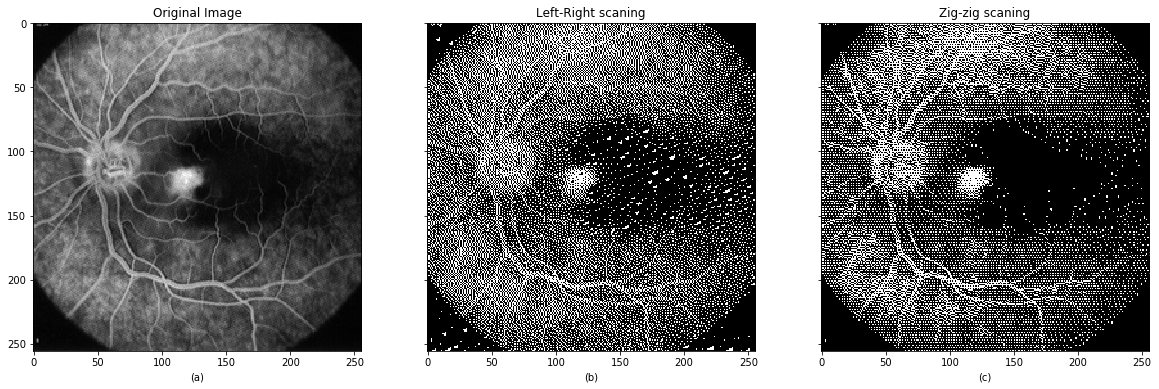

In [8]:
fig, (ax0, ax1, ax2) = plt.subplots(1, 3, sharex='col', sharey='row', figsize=(20,10))

ax0.imshow(original_img, cmap='gray')
ax0.set_xlabel("(a)")
ax0.set_title("Original Image")

ax1.imshow(out2, cmap='gray')
ax1.set_xlabel("(b)")
ax1.set_title("Left-Right scaning")

ax2.imshow(out1, cmap='gray')
ax2.set_xlabel("(c)")
ax2.set_title("Zig-zig scaning")

plt.show()